**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: Andrea Sánchez Martínez
*   MATRÍCULA: A01795414

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("credit_risk_dataset.csv")
df.head(15)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas? 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
person_age                    32581 non-null int64
person_income                 32581 non-null int64
person_home_ownership         32581 non-null object
person_emp_length             31686 non-null float64
loan_intent                   32581 non-null object
loan_grade                    32581 non-null object
loan_amnt                     32581 non-null int64
loan_int_rate                 29465 non-null float64
loan_status                   32581 non-null int64
loan_percent_income           32581 non-null float64
cb_person_default_on_file     32581 non-null object
cb_person_cred_hist_length    32581 non-null int64
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
#La coljmna `loan_status`es realmente categorica
df["loan_status"] = df['loan_status'].astype(object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
person_age                    32581 non-null int64
person_income                 32581 non-null int64
person_home_ownership         32581 non-null object
person_emp_length             31686 non-null float64
loan_intent                   32581 non-null object
loan_grade                    32581 non-null object
loan_amnt                     32581 non-null int64
loan_int_rate                 29465 non-null float64
loan_status                   32581 non-null object
loan_percent_income           32581 non-null float64
cb_person_default_on_file     32581 non-null object
cb_person_cred_hist_length    32581 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 3.0+ MB


In [6]:
#Columnas numericas
len(df.select_dtypes(include=np.number).columns)

7

In [7]:
#Columnas cualitaticas
len(df.select_dtypes(exclude=np.number).columns)

5

 2. Determina el porcentaje de valores faltantes por columna.

In [8]:
df.isna().sum() / len(df) * 100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis 
   
**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%) 

In [9]:
#Tendencia Central Media
df.mean()

person_age                       27.734600
person_income                 66074.848470
person_emp_length                 4.789686
loan_amnt                      9589.371106
loan_int_rate                    11.011695
loan_status                       0.218164
loan_percent_income               0.170203
cb_person_cred_hist_length        5.804211
dtype: float64

In [10]:
#Tendencia Central Mediana
df.median()

person_age                       26.00
person_income                 55000.00
person_emp_length                 4.00
loan_amnt                      8000.00
loan_int_rate                    10.99
loan_status                       0.00
loan_percent_income               0.15
cb_person_cred_hist_length        4.00
dtype: float64

In [11]:
#Dispecion o Variabilidad Mínimos
df.select_dtypes(include=np.number).min()

person_age                      20.00
person_income                 4000.00
person_emp_length                0.00
loan_amnt                      500.00
loan_int_rate                    5.42
loan_percent_income              0.00
cb_person_cred_hist_length       2.00
dtype: float64

In [12]:
#Dispecion o Variabilidad Máximos
df.select_dtypes(include=np.number).max()

person_age                        144.00
person_income                 6000000.00
person_emp_length                 123.00
loan_amnt                       35000.00
loan_int_rate                      23.22
loan_percent_income                 0.83
cb_person_cred_hist_length         30.00
dtype: float64

In [13]:
#Dispecion o Variabilidad Desviación Estandar
df.std()

person_age                        6.348078
person_income                 61983.119168
person_emp_length                 4.142630
loan_amnt                      6322.086646
loan_int_rate                     3.240459
loan_status                       0.413006
loan_percent_income               0.106782
cb_person_cred_hist_length        4.055001
dtype: float64

In [14]:
#Dispecion o Variabilidad Quantil 25%
df.quantile(.25)

person_age                       23.00
person_income                 38500.00
person_emp_length                 2.00
loan_amnt                      5000.00
loan_int_rate                     7.90
loan_percent_income               0.09
cb_person_cred_hist_length        3.00
Name: 0.25, dtype: float64

In [15]:
#Dispecion o Variabilidad Quantil 50%
df.quantile(.5)

person_age                       26.00
person_income                 55000.00
person_emp_length                 4.00
loan_amnt                      8000.00
loan_int_rate                    10.99
loan_percent_income               0.15
cb_person_cred_hist_length        4.00
Name: 0.5, dtype: float64

In [16]:
#Dispecion o Variabilidad Quantil 75%
df.quantile(.75)

person_age                       30.00
person_income                 79200.00
person_emp_length                 7.00
loan_amnt                     12200.00
loan_int_rate                    13.47
loan_percent_income               0.23
cb_person_cred_hist_length        8.00
Name: 0.75, dtype: float64

In [17]:
#podemos replicar todo lo anterios con la funcion descripe
df.select_dtypes(include=np.number).describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


In [18]:
#Forma
df.skew()

person_age                     2.581393
person_income                 32.865349
person_emp_length              2.614455
loan_amnt                      1.192477
loan_int_rate                  0.208550
loan_status                    1.364888
loan_percent_income            1.064669
cb_person_cred_hist_length     1.661790
dtype: float64

In [19]:
#Forma
df.kurt()

person_age                      18.560825
person_income                 2693.272776
person_emp_length               43.722338
loan_amnt                        1.423565
loan_int_rate                   -0.671609
loan_status                     -0.137088
loan_percent_income              1.223687
cb_person_cred_hist_length       3.716194
dtype: float64

**La variable `person_age` tiene una asimetría positiva y una curtosis Leptokurtic.**

**La variable `loan_int_rate` tiene una asimetría positiva aunque está muy cercana de ser simetrica y una curtosis Platykurtic aunque muy cercana de ser Mesokurtic por ser cercana de cero.**

4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable. 
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.
 
**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma. 

**Sí, podemos observar que todas las varibles númericas tienen una simetría positiva, es decir, la moda se escuentra antes de la mediana**

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.co

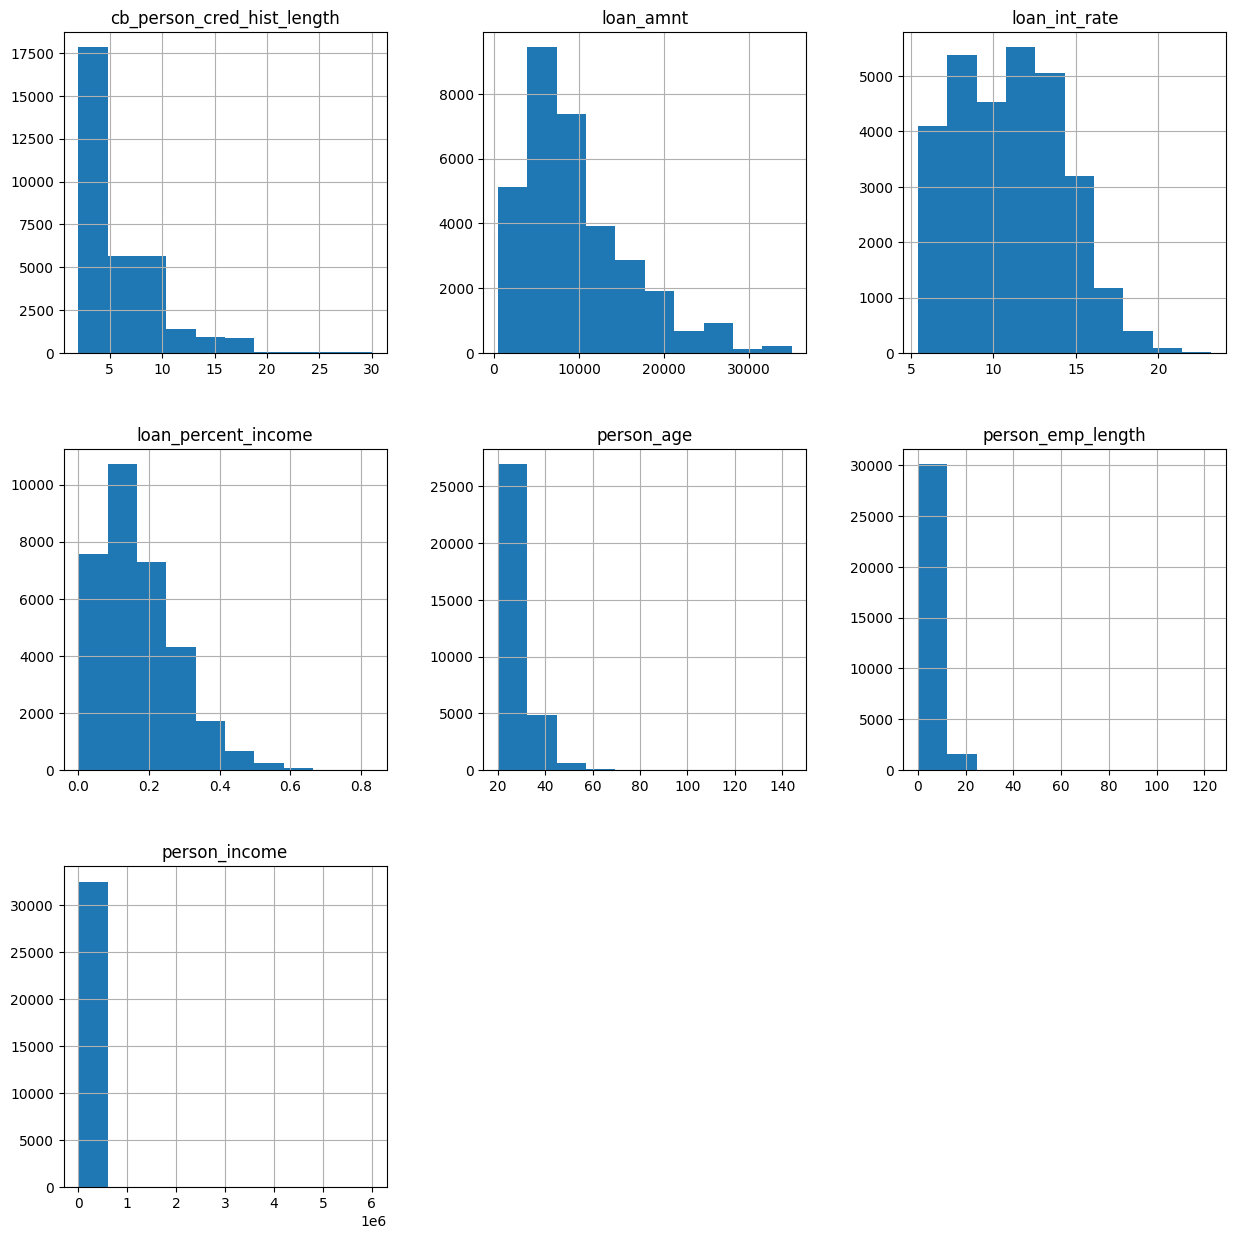

In [20]:
df.hist(figsize=(15,15))
plt.show()

5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles. 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.co

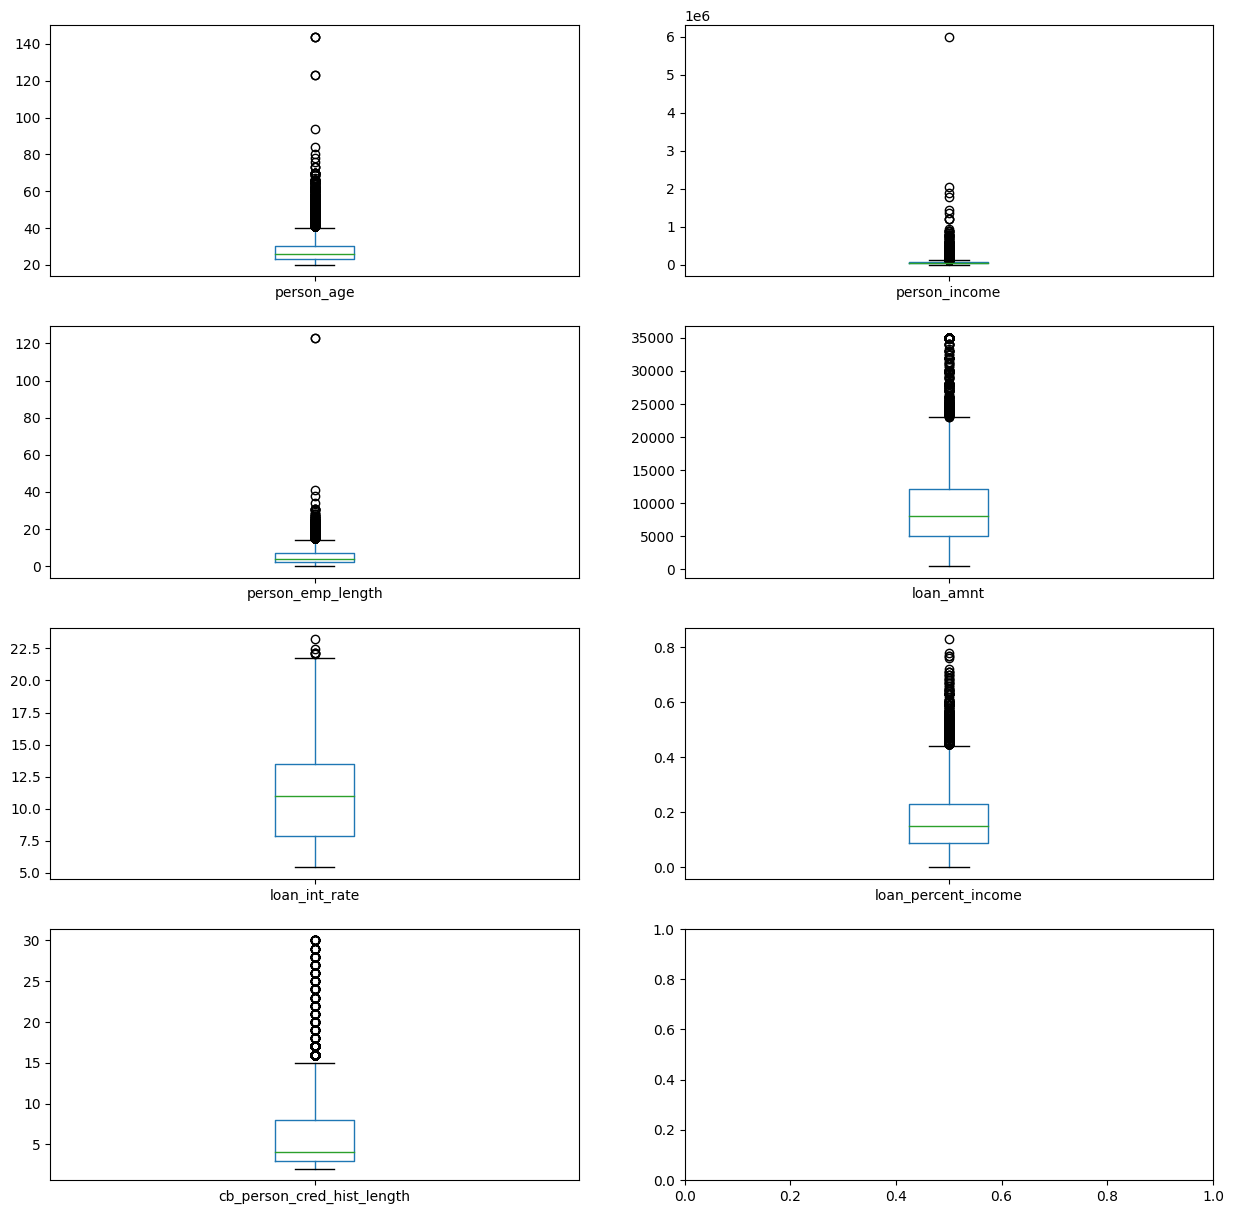

In [21]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(4,2,figsize=(15,15))
axes = axes.ravel()
for col, ax in zip(df[num_cols], axes):
  df[col].plot(kind='box', ax=ax) 

*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [22]:
percentile_25 = df["person_age"].quantile(0.25) 
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25 #Hace un DF de los valores que caen abajo del quantil 25 y arriba del quantil 75
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
29124,45,80000,RENT,10.0,MEDICAL,A,35000,NaN,1,0.44,N,13
29127,44,584800,MORTGAGE,4.0,MEDICAL,C,20000,NaN,1,0.03,Y,16
29131,43,500000,MORTGAGE,5.0,VENTURE,C,25000,12.61,0,0.05,Y,14
29133,41,480000,MORTGAGE,3.0,DEBTCONSOLIDATION,A,16000,7.90,0,0.03,N,17
29137,43,400000,MORTGAGE,5.0,VENTURE,B,28000,9.91,0,0.07,N,11


# Análisis de variables categóricas

 6. Obtén las siguientes estadísticas descriptivas para todas las variables categóricas:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)
   
**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object, que en este caso coinciden con las categóricas: `describe(include = 'object')`. Para los recuentos utiliza la función `df["columna"].value_counts()` 

In [23]:
#Tendencia central
df.select_dtypes(exclude=np.number).mode()

,person_home_ownership,loan_intent,loan_grade,loan_status,cb_person_default_on_file
0,RENT,EDUCATION,A,0,N


In [24]:
#Cardinalidad
df.select_dtypes(exclude=np.number).nunique()

person_home_ownership        4
loan_intent                  6
loan_grade                   7
loan_status                  2
cb_person_default_on_file    2
dtype: int64

In [25]:
df.describe(include="object")

,person_home_ownership,loan_intent,loan_grade,loan_status,cb_person_default_on_file
count,32581,32581,32581,32581,32581
unique,4,6,7,2,2
top,RENT,EDUCATION,A,0,N
freq,16446,6453,10777,25473,26836


In [26]:
#Recuento únicos
for column in df.select_dtypes(exclude=np.number).columns.to_list():
    print(df[column].value_counts())
    print('-' * 50)

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64
--------------------------------------------------
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64
--------------------------------------------------
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64
--------------------------------------------------
0    25473
1     7108
Name: loan_status, dtype: int64
--------------------------------------------------
N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64
--------------------------------------------------


7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables categóricas, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x="columna", data=df) `

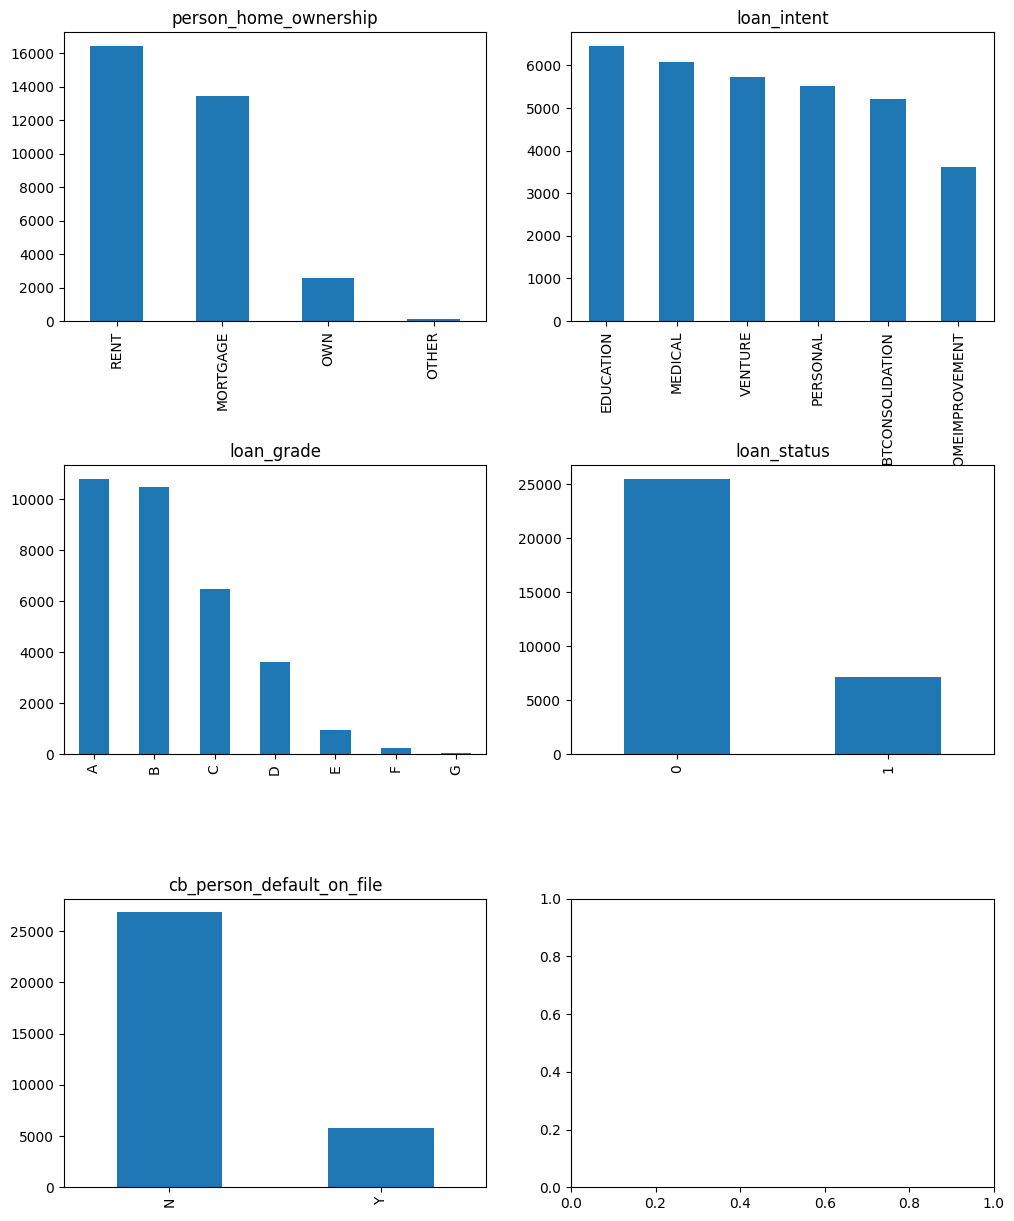

In [27]:
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

fig, axes = plt.subplots(3,2, figsize=(12,15))
plt.subplots_adjust(hspace=0.5)
axes = axes.ravel()
for col, ax in zip(df[cat_cols], axes):
  df[col].value_counts().plot(kind='bar', ax=ax) # ---> Pandas
  ax.set(title=f'{col}', xlabel=None)

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos: 

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `load_status`. Interpreta el resultado.

**Podemos observar que los préstamos sin incumplimiento son préstamos pequeños, es decir la relación préstamo-ingreso representa en promedio el 14% del ingreso total del solicitante.
Mientras que por otro lado, los préstamos con incumplimiento tienden a ser préstamos de mayor relación préstamos-ingreso, representando el 24% de ingresos,lo cual los convierte en préstamos complicados de pagar para el solicitante.
Cabe destacar que existe un mayor número de casos atípicos respecto a los préstamos sin incumpliento porque normalmente los préstamos que sobrepasan el 40% de la relación préstamo-ingreso se encuentran en la categoria de incumplimiento o demora**

<AxesSubplot:title={'center':'loan_percent_income'}, xlabel='loan_status'>

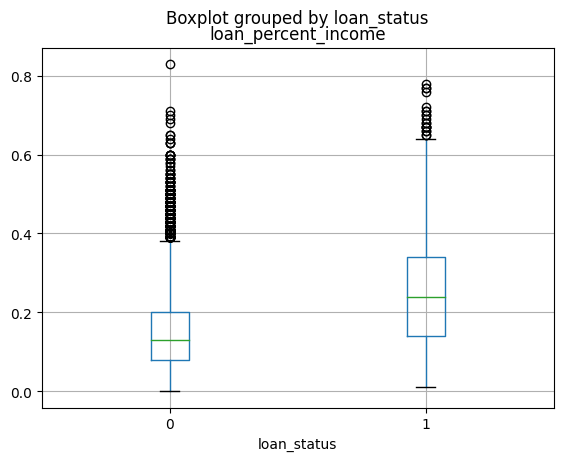

In [28]:
df.boxplot(column='loan_percent_income', by='loan_status')

 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

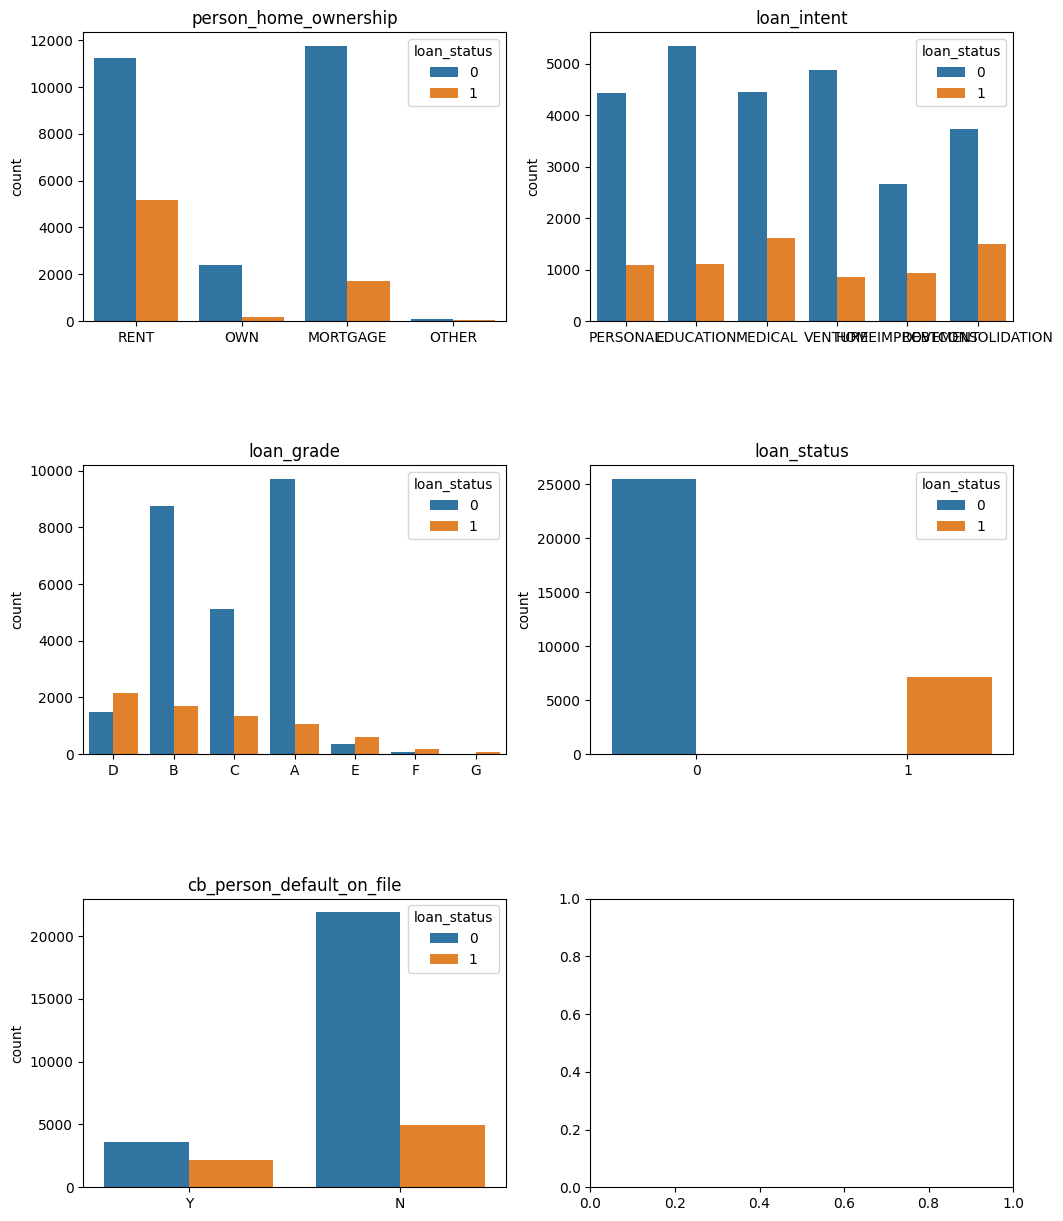

In [29]:
fig, axes = plt.subplots(3,2, figsize=(12,15))
plt.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for col, ax in zip(df[cat_cols], axes):
  sns.countplot(x=df[col], ax=ax, hue=df["loan_status"]) 
  ax.set(title=f'{col}', xlabel=None)

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

**`loan_percent_income` es la varible con mayor correlación a `loan_status`**

<AxesSubplot:>

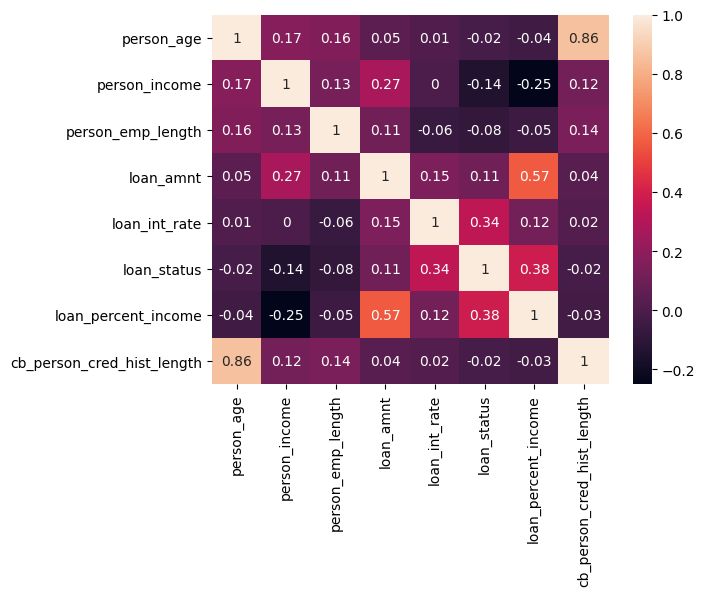

In [30]:
df["loan_status"] = df["loan_status"].astype(int)
sns.heatmap(round(df.corr(),2), annot = True)